<a href="https://colab.research.google.com/github/Patatone/Network-failure-cause-identification/blob/main/Failure_cause_identification_with_different_failures_location_IPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import platform 

from pathlib import Path
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
######################################################################################################
###### Task 1a) Define a function plot_scenario() that plots OSNR traces given a file name ###########
######          in input and saves the figure in a proper subfolder ##################################
######          Hints: use read_csv function of pandas library to load csv files content into ########
######          a dataframe. Note that raw data files have few header lines that we don't need to ####
######          load. In some cases files there might be rows with duplicate time and date: ##########
######          they have wrong frequency channel and they either have OSNR of -169 dB or no value ###
######          at all. We can check/drop duplicates on any relevant column (e.g. DATE) using ########
######          pandas.DataFrame.duplicated and pandas.DataFrame.drop_duplicates #####################
######################################################################################################

def plot_scenario(file_name, norm=False):
# Input: - file_name: name of the raw data file with OSNR values to be plotted
# Output: - plots of OSNR; figure should be saved into a subfolder ("Figures")

    scenario=file_name[9]
    lightpath=file_name.replace("Scenario_"+scenario+"_monitor_node_1_preamp_lpth_","").replace(".dat","")
    print('Plotting OSNR for scenario {}, lightpath {}'.format(scenario, lightpath))
    fig_folder = 'Figures' 
    if not os.path.exists(fig_folder):
        os.makedirs(fig_folder)
    
    data_raw = pd.read_csv(file_path + file_name.split("_monitor")[0] + '/' + file_name, skiprows = 5)
    data_raw = data_raw.drop_duplicates(subset=[data_raw.columns.values[0]]) #F: remove duplicates with same DATE field

    OSNR_list = data_raw.iloc[:, -1].to_numpy(dtype='float') # keep only the last column

    num_samples = len(OSNR_list)
    print('Number of OSNR samples: ' + str(num_samples))
    #print(OSNR_list.shape) # --> (21600,)

    fig, ax = plt.subplots()
    ax.plot(OSNR_list, label = lightpath)
    ax.set_title('Scenario: {}, Lightpath: {}'.format(scenario, lightpath))
    ax.set_xlabel('Samples, s')
    ax.set_ylabel('OSNR, dB')
    ax.legend(loc='best')
    ax.grid()
    
    fig.savefig(fig_folder + '/' + file_name.replace('.dat', '_raw.png'))
    

Scenario_0_monitor_node_1_preamp_lpth_2_1.dat
Plotting OSNR for scenario 0, lightpath 2_1
Number of OSNR samples: 21600

Scenario_0_monitor_node_1_preamp_lpth_3-1_1.dat
Plotting OSNR for scenario 0, lightpath 3-1_1
Number of OSNR samples: 21600

Scenario_0_monitor_node_1_preamp_lpth_3-2_1.dat
Plotting OSNR for scenario 0, lightpath 3-2_1
Number of OSNR samples: 21600

Scenario_1_monitor_node_1_preamp_lpth_2_1.dat
Plotting OSNR for scenario 1, lightpath 2_1
Number of OSNR samples: 21600

Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat
Plotting OSNR for scenario 1, lightpath 3-1_1
Number of OSNR samples: 21600

Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat
Plotting OSNR for scenario 1, lightpath 3-2_1
Number of OSNR samples: 21600

Scenario_2_monitor_node_1_preamp_lpth_2_1.dat
Plotting OSNR for scenario 2, lightpath 2_1
Number of OSNR samples: 21600

Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat
Plotting OSNR for scenario 2, lightpath 3-1_1
Number of OSNR samples: 21600

Scenario_2_m

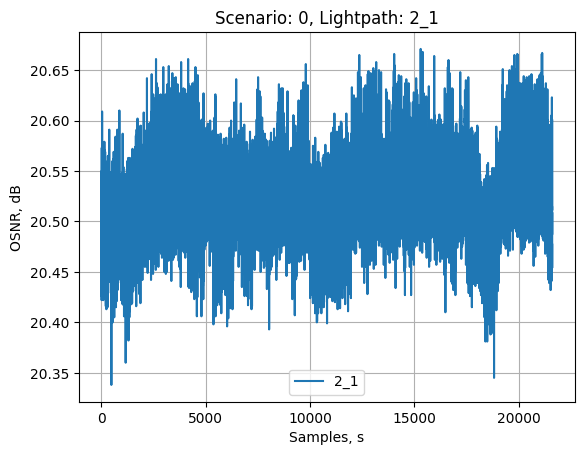

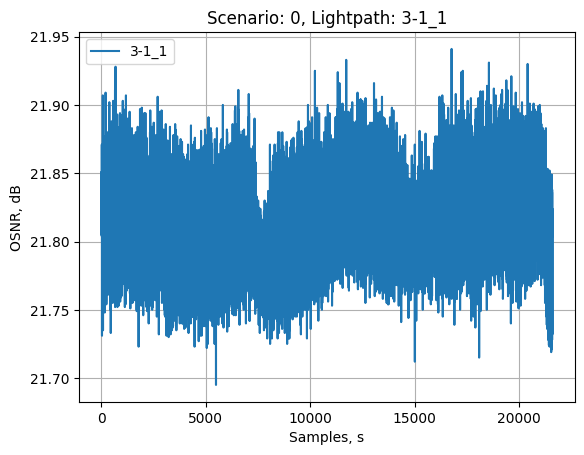

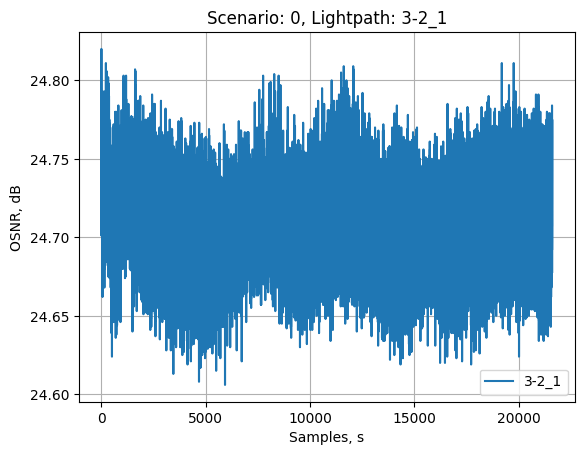

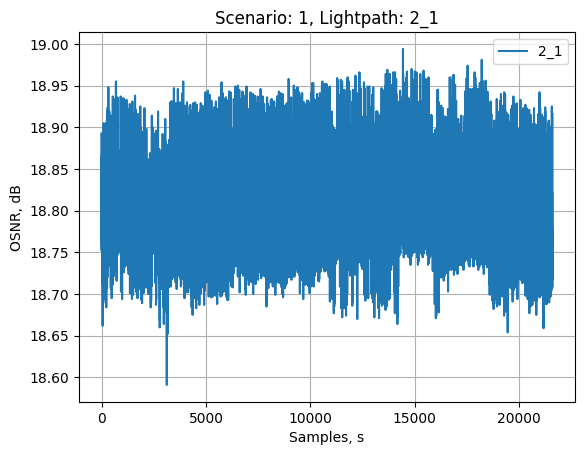

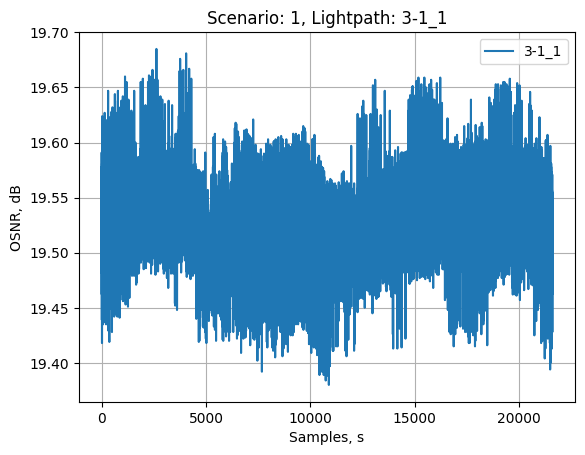

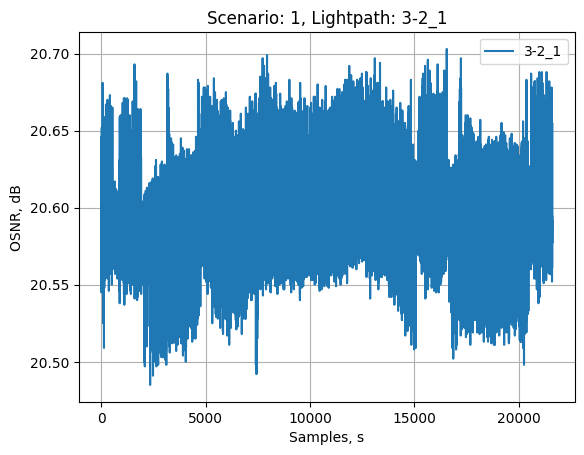

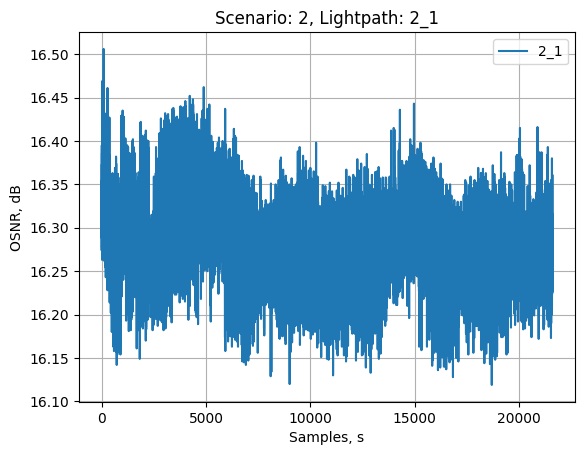

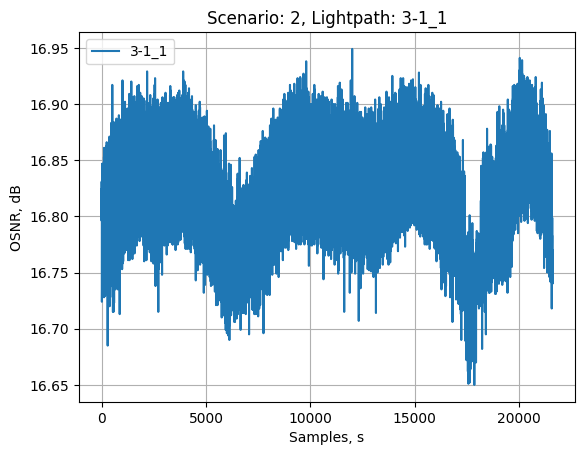

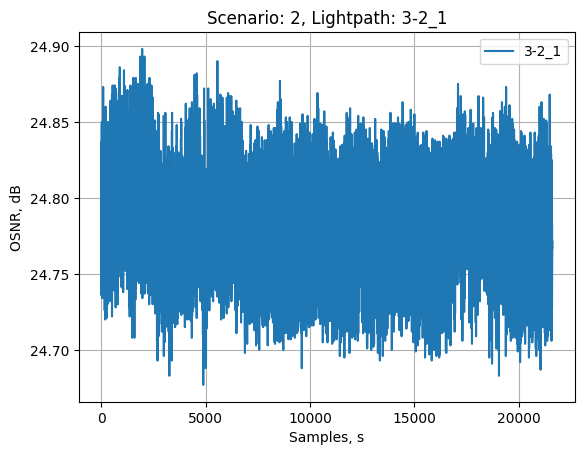

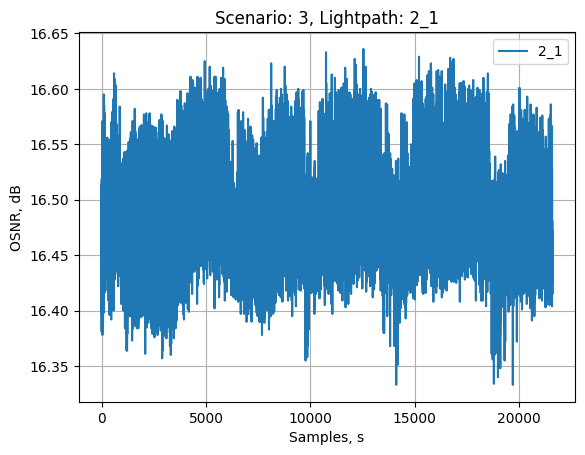

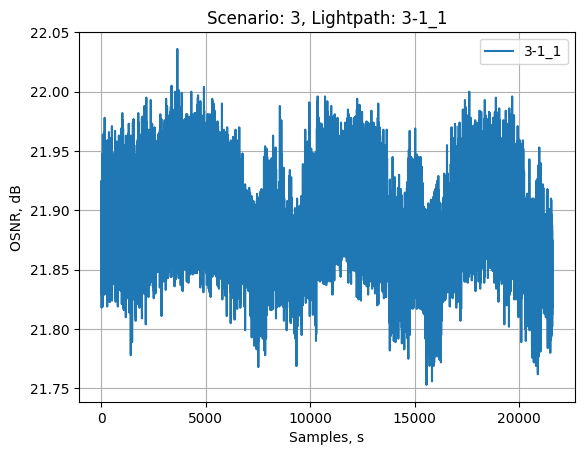

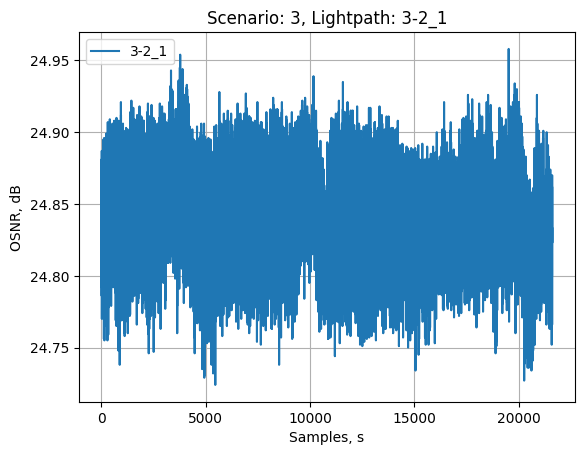

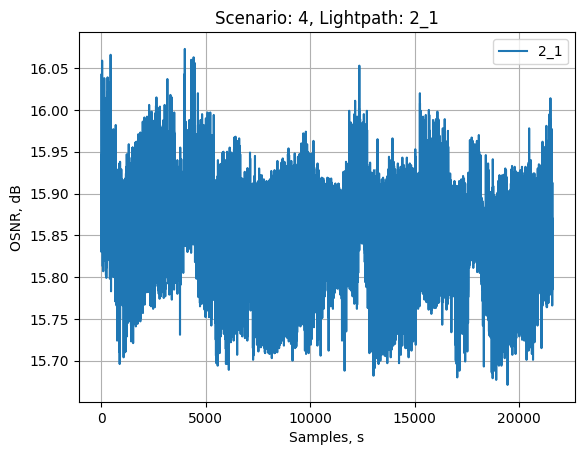

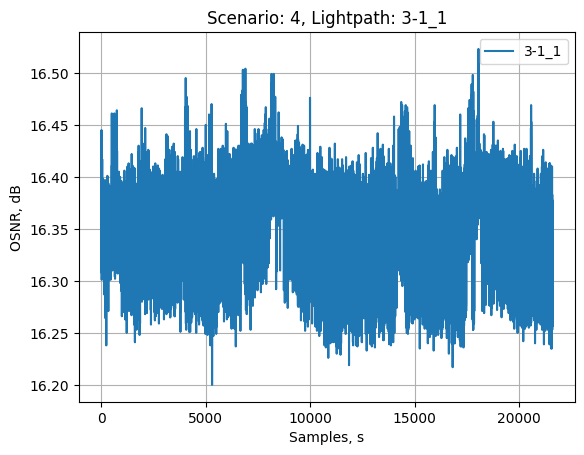

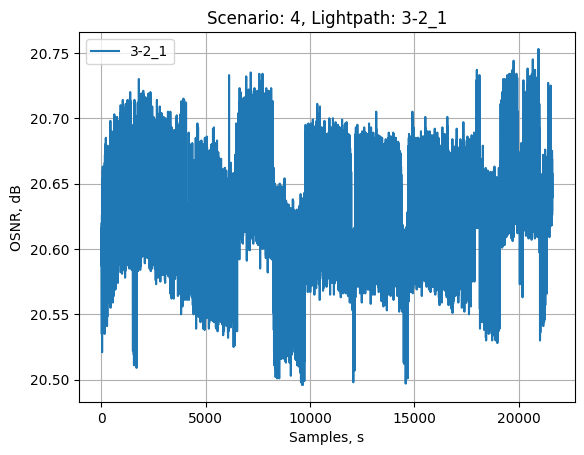

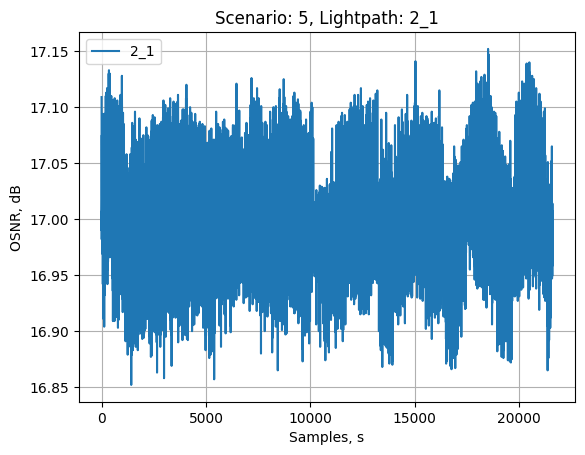

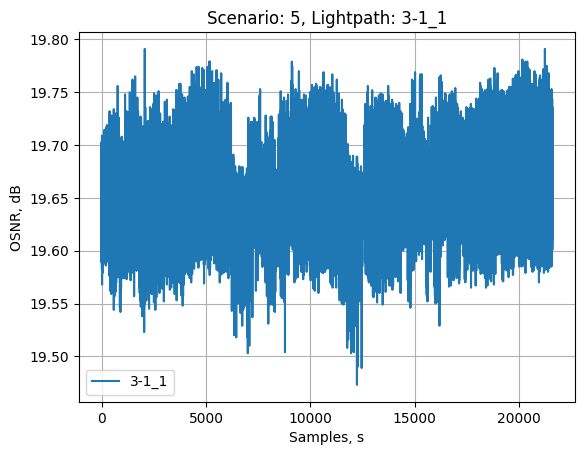

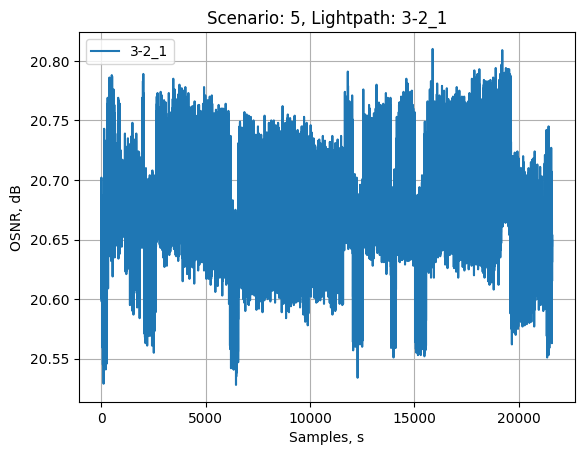

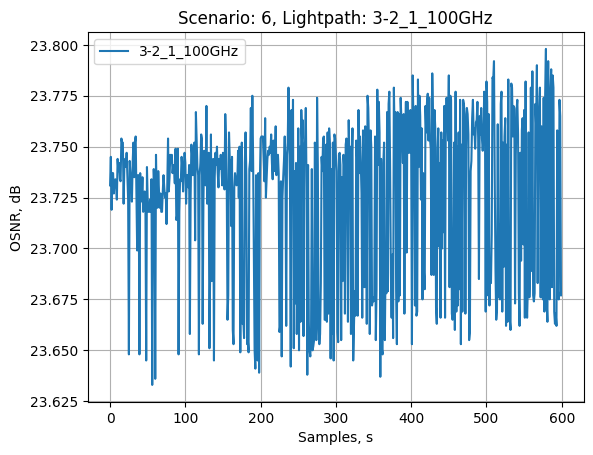

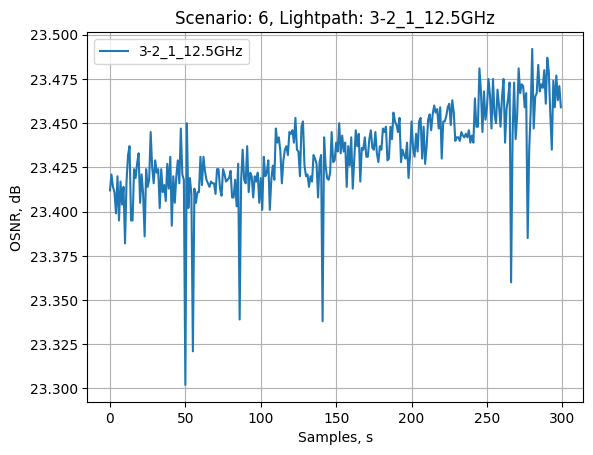

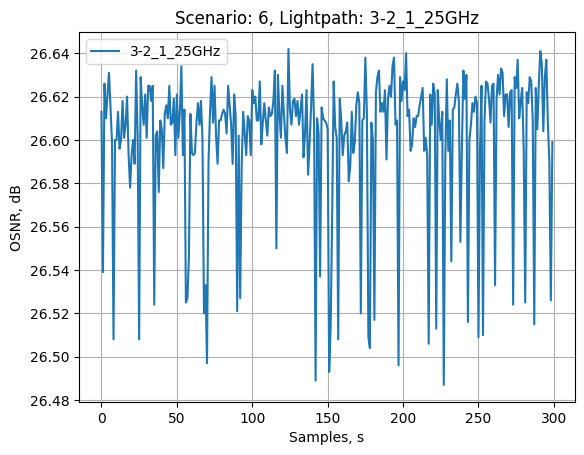

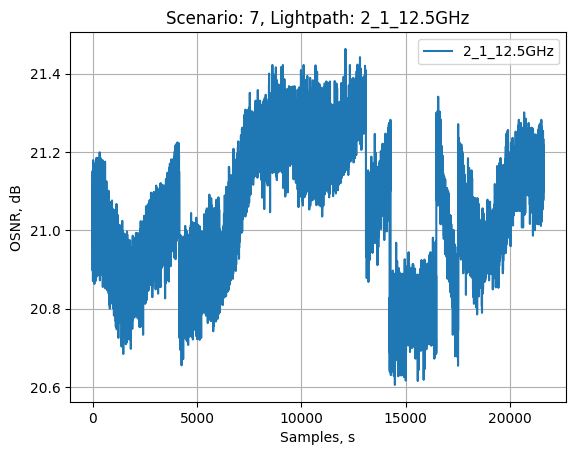

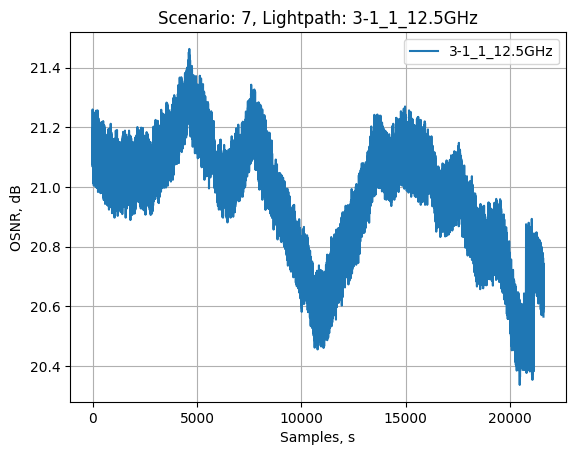

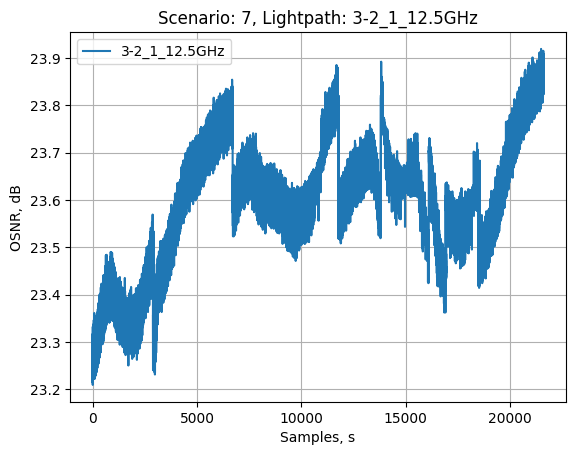

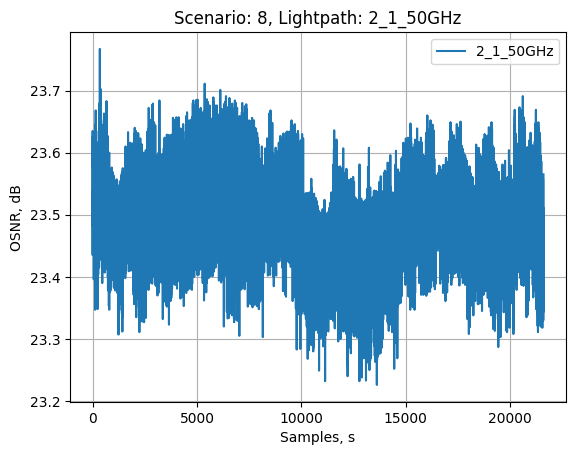

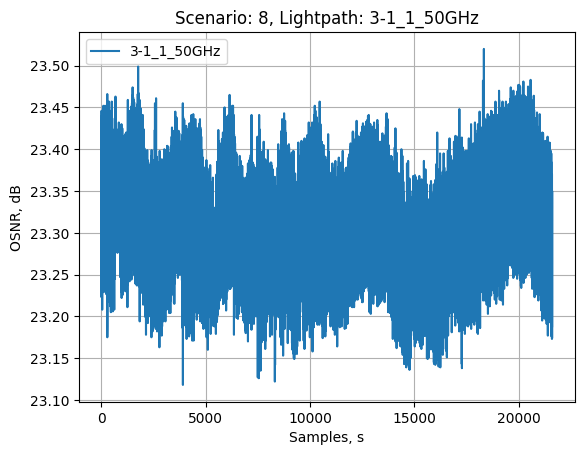

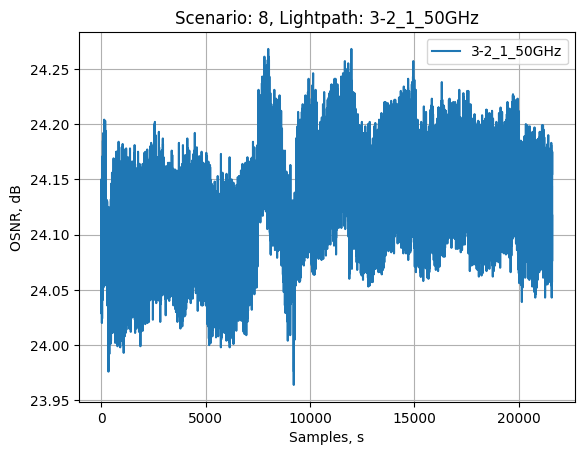

In [3]:
###########################################################################################
###### Task 1b) Use function plot_scenario() to plot OSNR figures for all scenarios
###########################################################################################

# Switch between Local and Colab execution
if platform.system() == 'Linux':
    from google.colab import drive
    drive.mount('/content/drive')
    file_path = '/content/drive/MyDrive/Colab Notebooks/NDAL_data/'
else:
    file_path = 'NDAL_data/'

for path in Path(file_path).rglob('*_preamp_lpth_*.dat'):
    print(path.name)
    plot_scenario(path.name)
    print()


In [4]:
#########################################################################################################
###### Task 2a) Define a function create_window_dataset() that takes in input raw data file, ############
######          window length and spacing and creates a features .dat file in a proper subfolder ########
#########################################################################################################

def create_window_dataset(filename, w_len=100, window_spacing=1):
#Inputs: - filename: name of the raw data file to be read
#        - w_len: window duration, i.e., no of OSNR samples in a same window (default=100)
#        - window_spacing: distance (in number of OSNR samples) between two adjacent windows (default=1)
#Outputs: - features file (.dat) with windows dataset; 
#           each row inlcudes the following features for a window of duration w_len: Mean, RMS, P2P, STD, MAX, MIN
#           The generated file should be put in a subfolder named "Features"

    print('Creating windows dataset from file {} (window length={}; spacing={})'.format(filename,w_len,window_spacing))
    feature_folder='Features'
    if not os.path.exists(feature_folder):
        os.makedirs(feature_folder)
        
    splitted_filename = filename.split('_')
    data_raw = pd.read_csv(file_path + splitted_filename[0] + '_' + splitted_filename[1] + '/' + filename, skiprows = 5)
    data_raw = data_raw.drop_duplicates(subset=[data_raw.columns.values[0]]) #F: remove duplicates with same DATE field
    
    OSNR_list = data_raw.iloc[:, -1].to_numpy(dtype='float') # keep only the last column
    num_samples = len(OSNR_list) #F: counts the number of OSNR samples in the file
    
    #F: write heading line on the windows dataset file (we have 6 features in total)
    head_line=[i for i in range(6)] #F: initialization
    
    head_line[0]='mean'
    head_line[1]='RMS'
    head_line[2]='ptp'
    head_line[3]='std'
    head_line[4]='max'
    head_line[5]='min'
    
    full_filename = feature_folder + '/' + filename.rstrip('.dat') + '_sp' + str(window_spacing) + '_w' + str(w_len) + '.dat' 
    
     # Write the only the first line
    with open(full_filename, 'a') as feature_file:
            feature_file.write(','.join(head_line))
            feature_file.write('\n')
    
    #F: now we write features for each OSNR window (one row = one window)    
    counter = 0 #F: represents the first OSNR sample of the current window being inserted in the features dataset
    last_window = False
    
    while last_window==False:
        #print('Creating window starting with sample no. {}.'.format(counter))

        # We create the window with OSNR_list indexed from "counter" to "counter + w_len"
        #F: note that last index (counter+w_len) is excluded
        OSNR_window = OSNR_list[counter : counter + w_len] #F: note that last index (counter+w_len) is excluded
        
        feature_vect = [] #F: this list stores the features for the current OSNR window
        feature_vect.append(np.mean(OSNR_window))
        feature_vect.append(np.sqrt(np.mean(OSNR_window**2))) #F: RMS
        feature_vect.append(np.ptp(OSNR_window))
        feature_vect.append(np.std(OSNR_window))
        feature_vect.append(max(OSNR_window))
        feature_vect.append(min(OSNR_window))

        # Iteration in the same line: for each "val" in "feature_vect" round "val" with 3 decimals
        str_feature_vect = [str(round(val, 3)) for val in feature_vect]
        
        with open(full_filename, 'a') as feature_file:
            feature_file.write(','.join(str_feature_vect))
            feature_file.write('\n')
            
        counter += window_spacing
        if counter + w_len > num_samples:
            print('Last window reached. Current window (with length {}) would start with ID {}, but last OSNR ID is {}\n'.format(w_len,counter,num_samples-1))
            last_window=True

In [5]:
##########################################################################################################
###### We use the function create_window_dataset() to generate features files for all scenarios
###### using window duration =10,20,...,100 seconds and window spacing = 1,2,...,10 seconds
##########################################################################################################

for path in Path(file_path).rglob('*_preamp_lpth_*.dat'):
    if ("Scenario_0" in path.name) or \
    ("Scenario_2_monitor_node_1_preamp_lpth_3-2_1" in path.name) or \
    ("Scenario_3_monitor_node_1_preamp_lpth_3-1_1" in path.name) or \
    ("Scenario_3_monitor_node_1_preamp_lpth_3-2_1" in path.name):
      continue
    for windowlength in range(10,101,10):
        for spacing in range(1,11,1):
            create_window_dataset(path.name, windowlength, spacing)


Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=2)
Last window reached. Current window (with length 10) would start with ID 21592, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=4)
Last window reached. Current window (with length 10) would start with ID 21592, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=5)
Last window reach

Last window reached. Current window (with length 40) would start with ID 21564, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=40; spacing=10)
Last window reached. Current window (with length 40) would start with ID 21570, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=50; spacing=1)
Last window reached. Current window (with length 50) would start with ID 21551, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=50; spacing=2)
Last window reached. Current window (with length 50) would start with ID 21552, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=50; spacing=3)
Last window reached. Current window (with length 50) would start with ID 21552, but last OSNR ID is 21599

Creating windows dat

Last window reached. Current window (with length 80) would start with ID 21525, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=80; spacing=8)
Last window reached. Current window (with length 80) would start with ID 21528, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=80; spacing=9)
Last window reached. Current window (with length 80) would start with ID 21528, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=80; spacing=10)
Last window reached. Current window (with length 80) would start with ID 21530, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=90; spacing=1)
Last window reached. Current window (with length 90) would start with ID 21511, but last OSNR ID is 21599

Creating windows dat

Last window reached. Current window (with length 20) would start with ID 21585, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=20; spacing=6)
Last window reached. Current window (with length 20) would start with ID 21582, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=20; spacing=7)
Last window reached. Current window (with length 20) would start with ID 21581, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=20; spacing=8)
Last window reached. Current window (with length 20) would start with ID 21584, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=20; spacing=9)
Last window reached. Current window (with length 20) would start with ID 21582, but last OSNR ID is 21599

Creating wind

Last window reached. Current window (with length 60) would start with ID 21543, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=60; spacing=4)
Last window reached. Current window (with length 60) would start with ID 21544, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=60; spacing=5)
Last window reached. Current window (with length 60) would start with ID 21545, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=60; spacing=6)
Last window reached. Current window (with length 60) would start with ID 21546, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=60; spacing=7)
Last window reached. Current window (with length 60) would start with ID 21546, but last OSNR ID is 21599

Creating wind

Last window reached. Current window (with length 100) would start with ID 21501, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=100; spacing=2)
Last window reached. Current window (with length 100) would start with ID 21502, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=100; spacing=3)
Last window reached. Current window (with length 100) would start with ID 21501, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=100; spacing=4)
Last window reached. Current window (with length 100) would start with ID 21504, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=100; spacing=5)
Last window reached. Current window (with length 100) would start with ID 21505, but last OSNR ID is 21599

Crea

Last window reached. Current window (with length 30) would start with ID 21573, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=30; spacing=10)
Last window reached. Current window (with length 30) would start with ID 21580, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=40; spacing=1)
Last window reached. Current window (with length 40) would start with ID 21561, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=40; spacing=2)
Last window reached. Current window (with length 40) would start with ID 21562, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=40; spacing=3)
Last window reached. Current window (with length 40) would start with ID 21561, but last OSNR ID is 21599

Creating win

Last window reached. Current window (with length 70) would start with ID 21532, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=70; spacing=8)
Last window reached. Current window (with length 70) would start with ID 21536, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=70; spacing=9)
Last window reached. Current window (with length 70) would start with ID 21537, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=70; spacing=10)
Last window reached. Current window (with length 70) would start with ID 21540, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=80; spacing=1)
Last window reached. Current window (with length 80) would start with ID 21521, but last OSNR ID is 21599

Creating win

Last window reached. Current window (with length 10) would start with ID 21595, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=6)
Last window reached. Current window (with length 10) would start with ID 21594, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=7)
Last window reached. Current window (with length 10) would start with ID 21595, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=8)
Last window reached. Current window (with length 10) would start with ID 21592, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=9)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows data

Last window reached. Current window (with length 50) would start with ID 21552, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=50; spacing=4)
Last window reached. Current window (with length 50) would start with ID 21552, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=50; spacing=5)
Last window reached. Current window (with length 50) would start with ID 21555, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=50; spacing=6)
Last window reached. Current window (with length 50) would start with ID 21552, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=50; spacing=7)
Last window reached. Current window (with length 50) would start with ID 21553, but last OSNR ID is 21599

Creating windows data

Last window reached. Current window (with length 90) would start with ID 21511, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=90; spacing=2)
Last window reached. Current window (with length 90) would start with ID 21512, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=90; spacing=3)
Last window reached. Current window (with length 90) would start with ID 21513, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=90; spacing=4)
Last window reached. Current window (with length 90) would start with ID 21512, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=90; spacing=5)
Last window reached. Current window (with length 90) would start with ID 21515, but last OSNR ID is 21599

Creating windows data

Last window reached. Current window (with length 20) would start with ID 21582, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=20; spacing=10)
Last window reached. Current window (with length 20) would start with ID 21590, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=30; spacing=1)
Last window reached. Current window (with length 30) would start with ID 21571, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=30; spacing=2)
Last window reached. Current window (with length 30) would start with ID 21572, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=30; spacing=3)
Last window reached. Current window (with length 30) would start with ID 21573, but last OSNR ID is 21599

Creating win

Last window reached. Current window (with length 60) would start with ID 21546, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=60; spacing=8)
Last window reached. Current window (with length 60) would start with ID 21544, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=60; spacing=9)
Last window reached. Current window (with length 60) would start with ID 21546, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=60; spacing=10)
Last window reached. Current window (with length 60) would start with ID 21550, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=70; spacing=1)
Last window reached. Current window (with length 70) would start with ID 21531, but last OSNR ID is 21599

Creating win

Last window reached. Current window (with length 100) would start with ID 21505, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=100; spacing=6)
Last window reached. Current window (with length 100) would start with ID 21504, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=100; spacing=7)
Last window reached. Current window (with length 100) would start with ID 21504, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=100; spacing=8)
Last window reached. Current window (with length 100) would start with ID 21504, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=100; spacing=9)
Last window reached. Current window (with length 100) would start with ID 21501, but last OSNR ID is 21599

Crea

Last window reached. Current window (with length 40) would start with ID 21561, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=40; spacing=4)
Last window reached. Current window (with length 40) would start with ID 21564, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=40; spacing=5)
Last window reached. Current window (with length 40) would start with ID 21565, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=40; spacing=6)
Last window reached. Current window (with length 40) would start with ID 21564, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=40; spacing=7)
Last window reached. Current window (with length 40) would start with ID 21567, but last OSNR ID is 21599

Creating windows data

Last window reached. Current window (with length 80) would start with ID 21521, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=80; spacing=2)
Last window reached. Current window (with length 80) would start with ID 21522, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=80; spacing=3)
Last window reached. Current window (with length 80) would start with ID 21522, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=80; spacing=4)
Last window reached. Current window (with length 80) would start with ID 21524, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=80; spacing=5)
Last window reached. Current window (with length 80) would start with ID 21525, but last OSNR ID is 21599

Creating windows data

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=10)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=20; spacing=1)
Last window reached. Current window (with length 20) would start with ID 21581, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=20; spacing=2)
Last window reached. Current window (with length 20) would start with ID 21582, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=20; spacing=3)
Last window reached. Current window (with length 20) would start with ID 21582, but last OSNR ID is 21599

Creating windows dat

Last window reached. Current window (with length 50) would start with ID 21553, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=50; spacing=8)
Last window reached. Current window (with length 50) would start with ID 21552, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=50; spacing=9)
Last window reached. Current window (with length 50) would start with ID 21555, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=50; spacing=10)
Last window reached. Current window (with length 50) would start with ID 21560, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=60; spacing=1)
Last window reached. Current window (with length 60) would start with ID 21541, but last OSNR ID is 21599

Creating windows dat

Last window reached. Current window (with length 90) would start with ID 21515, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=90; spacing=6)
Last window reached. Current window (with length 90) would start with ID 21516, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=90; spacing=7)
Last window reached. Current window (with length 90) would start with ID 21511, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=90; spacing=8)
Last window reached. Current window (with length 90) would start with ID 21512, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=90; spacing=9)
Last window reached. Current window (with length 90) would start with ID 21519, but last OSNR ID is 21599

Creating windows data

Last window reached. Current window (with length 30) would start with ID 21573, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=30; spacing=4)
Last window reached. Current window (with length 30) would start with ID 21572, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=30; spacing=5)
Last window reached. Current window (with length 30) would start with ID 21575, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=30; spacing=6)
Last window reached. Current window (with length 30) would start with ID 21576, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=30; spacing=7)
Last window reached. Current window (with length 30) would start with ID 21574, but last OSNR ID is 21599

Creating wind

Last window reached. Current window (with length 70) would start with ID 21531, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=70; spacing=2)
Last window reached. Current window (with length 70) would start with ID 21532, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=70; spacing=3)
Last window reached. Current window (with length 70) would start with ID 21531, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=70; spacing=4)
Last window reached. Current window (with length 70) would start with ID 21532, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=70; spacing=5)
Last window reached. Current window (with length 70) would start with ID 21535, but last OSNR ID is 21599

Creating wind

Last window reached. Current window (with length 100) would start with ID 21501, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=100; spacing=10)
Last window reached. Current window (with length 100) would start with ID 21510, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=2)
Last window reached. Current window (with length 10) would start with ID 21592, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating 

Last window reached. Current window (with length 40) would start with ID 21567, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=40; spacing=8)
Last window reached. Current window (with length 40) would start with ID 21568, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=40; spacing=9)
Last window reached. Current window (with length 40) would start with ID 21564, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=40; spacing=10)
Last window reached. Current window (with length 40) would start with ID 21570, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=50; spacing=1)
Last window reached. Current window (with length 50) would start with ID 21551, but last OSNR ID is 21599

Creating win

Last window reached. Current window (with length 80) would start with ID 21525, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=80; spacing=6)
Last window reached. Current window (with length 80) would start with ID 21522, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=80; spacing=7)
Last window reached. Current window (with length 80) would start with ID 21525, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=80; spacing=8)
Last window reached. Current window (with length 80) would start with ID 21528, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=80; spacing=9)
Last window reached. Current window (with length 80) would start with ID 21528, but last OSNR ID is 21599

Creating wind

Last window reached. Current window (with length 20) would start with ID 21582, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=20; spacing=4)
Last window reached. Current window (with length 20) would start with ID 21584, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=20; spacing=5)
Last window reached. Current window (with length 20) would start with ID 21585, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=20; spacing=6)
Last window reached. Current window (with length 20) would start with ID 21582, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=20; spacing=7)
Last window reached. Current window (with length 20) would start with ID 21581, but last OSNR ID is 21599

Creating windows data

Last window reached. Current window (with length 60) would start with ID 21541, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=60; spacing=2)
Last window reached. Current window (with length 60) would start with ID 21542, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=60; spacing=3)
Last window reached. Current window (with length 60) would start with ID 21543, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=60; spacing=4)
Last window reached. Current window (with length 60) would start with ID 21544, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=60; spacing=5)
Last window reached. Current window (with length 60) would start with ID 21545, but last OSNR ID is 21599

Creating windows data

Last window reached. Current window (with length 90) would start with ID 21519, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=90; spacing=10)
Last window reached. Current window (with length 90) would start with ID 21520, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=100; spacing=1)
Last window reached. Current window (with length 100) would start with ID 21501, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=100; spacing=2)
Last window reached. Current window (with length 100) would start with ID 21502, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=100; spacing=3)
Last window reached. Current window (with length 100) would start with ID 21501, but last OSNR ID is 21599

Creating windo

Last window reached. Current window (with length 30) would start with ID 21574, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=30; spacing=8)
Last window reached. Current window (with length 30) would start with ID 21576, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=30; spacing=9)
Last window reached. Current window (with length 30) would start with ID 21573, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=30; spacing=10)
Last window reached. Current window (with length 30) would start with ID 21570, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=40; spacing=1)
Last window reached. Current window (with length 40) would start with ID 21560, but last OSNR ID is 21598

Creating win

Last window reached. Current window (with length 70) would start with ID 21530, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=70; spacing=6)
Last window reached. Current window (with length 70) would start with ID 21534, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=70; spacing=7)
Last window reached. Current window (with length 70) would start with ID 21532, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=70; spacing=8)
Last window reached. Current window (with length 70) would start with ID 21536, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=70; spacing=9)
Last window reached. Current window (with length 70) would start with ID 21537, but last OSNR ID is 21598

Creating wind

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=4)
Last window reached. Current window (with length 10) would start with ID 21592, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=5)
Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=6)
Last window reached. Current window (with length 10) would start with ID 21594, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=7)
Last window reached. Current window (with length 10) would start with ID 21595, but last OSNR ID is 21598

Creating wind

Last window reached. Current window (with length 50) would start with ID 21550, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=50; spacing=2)
Last window reached. Current window (with length 50) would start with ID 21550, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=50; spacing=3)
Last window reached. Current window (with length 50) would start with ID 21552, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=50; spacing=4)
Last window reached. Current window (with length 50) would start with ID 21552, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=50; spacing=5)
Last window reached. Current window (with length 50) would start with ID 21550, but last OSNR ID is 21598

Creating wind

Last window reached. Current window (with length 80) would start with ID 21528, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=80; spacing=10)
Last window reached. Current window (with length 80) would start with ID 21520, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=90; spacing=1)
Last window reached. Current window (with length 90) would start with ID 21510, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=90; spacing=2)
Last window reached. Current window (with length 90) would start with ID 21510, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=90; spacing=3)
Last window reached. Current window (with length 90) would start with ID 21510, but last OSNR ID is 21598

Creating win

Last window reached. Current window (with length 20) would start with ID 582, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=20; spacing=7)
Last window reached. Current window (with length 20) would start with ID 581, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=20; spacing=8)
Last window reached. Current window (with length 20) would start with ID 584, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=20; spacing=9)
Last window reached. Current window (with length 20) would start with ID 585, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=20; spacing=10)
Last window reached. Current window (with length 20) would start with ID 590, but last OSNR ID is 599

Crea

Last window reached. Current window (with length 60) would start with ID 543, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=60; spacing=4)
Last window reached. Current window (with length 60) would start with ID 544, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=60; spacing=5)
Last window reached. Current window (with length 60) would start with ID 545, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=60; spacing=6)
Last window reached. Current window (with length 60) would start with ID 546, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=60; spacing=7)
Last window reached. Current window (with length 60) would start with ID 546, but last OSNR ID is 599

Creat

Last window reached. Current window (with length 100) would start with ID 501, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=100; spacing=2)
Last window reached. Current window (with length 100) would start with ID 502, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=100; spacing=3)
Last window reached. Current window (with length 100) would start with ID 501, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=100; spacing=4)
Last window reached. Current window (with length 100) would start with ID 504, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=100; spacing=5)
Last window reached. Current window (with length 100) would start with ID 505, but last OSNR ID is 5

Last window reached. Current window (with length 30) would start with ID 279, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=30; spacing=10)
Last window reached. Current window (with length 30) would start with ID 280, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=40; spacing=1)
Last window reached. Current window (with length 40) would start with ID 261, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=40; spacing=2)
Last window reached. Current window (with length 40) would start with ID 262, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=40; spacing=3)
Last window reached. Current window (with length 40) would start with ID 261, but last OSNR ID is 299



Last window reached. Current window (with length 70) would start with ID 234, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=70; spacing=7)
Last window reached. Current window (with length 70) would start with ID 231, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=70; spacing=8)
Last window reached. Current window (with length 70) would start with ID 232, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=70; spacing=9)
Last window reached. Current window (with length 70) would start with ID 234, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=70; spacing=10)
Last window reached. Current window (with length 70) would start with ID 240, but last OSNR ID is 299



Last window reached. Current window (with length 10) would start with ID 292, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=10; spacing=5)
Last window reached. Current window (with length 10) would start with ID 295, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=10; spacing=6)
Last window reached. Current window (with length 10) would start with ID 294, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=10; spacing=7)
Last window reached. Current window (with length 10) would start with ID 294, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=10; spacing=8)
Last window reached. Current window (with length 10) would start with ID 296, but last OSNR ID is 299

Creating 

Last window reached. Current window (with length 50) would start with ID 252, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=50; spacing=3)
Last window reached. Current window (with length 50) would start with ID 252, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=50; spacing=4)
Last window reached. Current window (with length 50) would start with ID 252, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=50; spacing=5)
Last window reached. Current window (with length 50) would start with ID 255, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=50; spacing=6)
Last window reached. Current window (with length 50) would start with ID 252, but last OSNR ID is 299

Creating 

Last window reached. Current window (with length 90) would start with ID 211, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=90; spacing=2)
Last window reached. Current window (with length 90) would start with ID 212, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=90; spacing=3)
Last window reached. Current window (with length 90) would start with ID 213, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=90; spacing=4)
Last window reached. Current window (with length 90) would start with ID 212, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=90; spacing=5)
Last window reached. Current window (with length 90) would start with ID 215, but last OSNR ID is 299

Creating 

Last window reached. Current window (with length 20) would start with ID 21584, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=20; spacing=9)
Last window reached. Current window (with length 20) would start with ID 21582, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=20; spacing=10)
Last window reached. Current window (with length 20) would start with ID 21590, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=30; spacing=1)
Last window reached. Current window (with length 30) would start with ID 21571, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=30; spacing=2)
Last window reached. Current window (with length 30) would start with ID 21572, but last OSNR I

Last window reached. Current window (with length 60) would start with ID 21545, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=60; spacing=6)
Last window reached. Current window (with length 60) would start with ID 21546, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=60; spacing=7)
Last window reached. Current window (with length 60) would start with ID 21546, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=60; spacing=8)
Last window reached. Current window (with length 60) would start with ID 21544, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=60; spacing=9)
Last window reached. Current window (with length 60) would start with ID 21546, but last OSNR ID

Last window reached. Current window (with length 100) would start with ID 21502, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=100; spacing=3)
Last window reached. Current window (with length 100) would start with ID 21501, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=100; spacing=4)
Last window reached. Current window (with length 100) would start with ID 21504, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=100; spacing=5)
Last window reached. Current window (with length 100) would start with ID 21505, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=100; spacing=6)
Last window reached. Current window (with length 100) would start with ID 21504, but las

Last window reached. Current window (with length 30) would start with ID 21576, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=30; spacing=9)
Last window reached. Current window (with length 30) would start with ID 21573, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=30; spacing=10)
Last window reached. Current window (with length 30) would start with ID 21580, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=40; spacing=1)
Last window reached. Current window (with length 40) would start with ID 21561, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=40; spacing=2)
Last window reached. Current window (with length 40) would start with ID 21562, but las

Last window reached. Current window (with length 70) would start with ID 21532, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=70; spacing=5)
Last window reached. Current window (with length 70) would start with ID 21535, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=70; spacing=6)
Last window reached. Current window (with length 70) would start with ID 21534, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=70; spacing=7)
Last window reached. Current window (with length 70) would start with ID 21532, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=70; spacing=8)
Last window reached. Current window (with length 70) would start with ID 21536, but last

Last window reached. Current window (with length 100) would start with ID 21510, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=2)
Last window reached. Current window (with length 10) would start with ID 21592, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=4)
Last window reached. Current window (with length 10) would start with ID 21592, but las

Last window reached. Current window (with length 40) would start with ID 21564, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=40; spacing=7)
Last window reached. Current window (with length 40) would start with ID 21567, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=40; spacing=8)
Last window reached. Current window (with length 40) would start with ID 21568, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=40; spacing=9)
Last window reached. Current window (with length 40) would start with ID 21564, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=40; spacing=10)
Last window reached. Current window (with length 40) would start with ID 21570, but las

Last window reached. Current window (with length 80) would start with ID 21522, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=80; spacing=3)
Last window reached. Current window (with length 80) would start with ID 21522, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=80; spacing=4)
Last window reached. Current window (with length 80) would start with ID 21524, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=80; spacing=5)
Last window reached. Current window (with length 80) would start with ID 21525, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=80; spacing=6)
Last window reached. Current window (with length 80) would start with ID 21522, but last

Last window reached. Current window (with length 10) would start with ID 21592, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=10; spacing=9)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=10; spacing=10)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=20; spacing=1)
Last window reached. Current window (with length 20) would start with ID 21581, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=20; spacing=2)
Last window reached. Current window (with length 20) would start with ID 21582, but last OSNR ID is 215

Last window reached. Current window (with length 50) would start with ID 21555, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=50; spacing=6)
Last window reached. Current window (with length 50) would start with ID 21552, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=50; spacing=7)
Last window reached. Current window (with length 50) would start with ID 21553, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=50; spacing=8)
Last window reached. Current window (with length 50) would start with ID 21552, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=50; spacing=9)
Last window reached. Current window (with length 50) would start with ID 21555, but last OSNR ID is 2159

Last window reached. Current window (with length 90) would start with ID 21512, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=90; spacing=3)
Last window reached. Current window (with length 90) would start with ID 21513, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=90; spacing=4)
Last window reached. Current window (with length 90) would start with ID 21512, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=90; spacing=5)
Last window reached. Current window (with length 90) would start with ID 21515, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=90; spacing=6)
Last window reached. Current window (with length 90) would start with ID 21516, but last OSNR ID is 2159

Last window reached. Current window (with length 20) would start with ID 21582, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=20; spacing=10)
Last window reached. Current window (with length 20) would start with ID 21590, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=30; spacing=1)
Last window reached. Current window (with length 30) would start with ID 21571, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=30; spacing=2)
Last window reached. Current window (with length 30) would start with ID 21572, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=30; spacing=3)
Last window reached. Current window (with length 30) would start with ID 21573, but last OSNR I

Last window reached. Current window (with length 60) would start with ID 21546, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=60; spacing=7)
Last window reached. Current window (with length 60) would start with ID 21546, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=60; spacing=8)
Last window reached. Current window (with length 60) would start with ID 21544, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=60; spacing=9)
Last window reached. Current window (with length 60) would start with ID 21546, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=60; spacing=10)
Last window reached. Current window (with length 60) would start with ID 21550, but last OSNR I

Last window reached. Current window (with length 100) would start with ID 21501, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=100; spacing=4)
Last window reached. Current window (with length 100) would start with ID 21504, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=100; spacing=5)
Last window reached. Current window (with length 100) would start with ID 21505, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=100; spacing=6)
Last window reached. Current window (with length 100) would start with ID 21504, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=100; spacing=7)
Last window reached. Current window (with length 100) would start with ID 21504, but las

Last window reached. Current window (with length 30) would start with ID 21580, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=40; spacing=1)
Last window reached. Current window (with length 40) would start with ID 21561, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=40; spacing=2)
Last window reached. Current window (with length 40) would start with ID 21562, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=40; spacing=3)
Last window reached. Current window (with length 40) would start with ID 21561, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=40; spacing=4)
Last window reached. Current window (with length 40) would start with ID 21564, but last OSNR ID

Last window reached. Current window (with length 70) would start with ID 21532, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=70; spacing=8)
Last window reached. Current window (with length 70) would start with ID 21536, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=70; spacing=9)
Last window reached. Current window (with length 70) would start with ID 21537, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=70; spacing=10)
Last window reached. Current window (with length 70) would start with ID 21540, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=80; spacing=1)
Last window reached. Current window (with length 80) would start with ID 21521, but last OSNR I